## Project Employee Satisfaction
Using Logistic Regression to Identify Factors That Contribute to Employee Satisfaction.

Dataset: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/code


In [15]:
## Imports 
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
## dataload
data = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
data.shape

(1470, 35)

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.isna().sum().sum()

0

In [7]:
# Missing values
data.isnull().values.any()


False

In [8]:
# duplicated values
data.duplicated().sum()

0

In [13]:
# target
count_target  = data['Attrition'].value_counts()

In [12]:
#Percent of target
perc_target = data['Attrition'].value_counts(normalize=True)*100
perc_target

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [14]:
tab_target = pd.DataFrame({'Contagem': count_target, 'Percent Target%': perc_target})
tab_target

,Contagem,Percent Target%
Attrition,,
No,1233,83.877551
Yes,237,16.122449


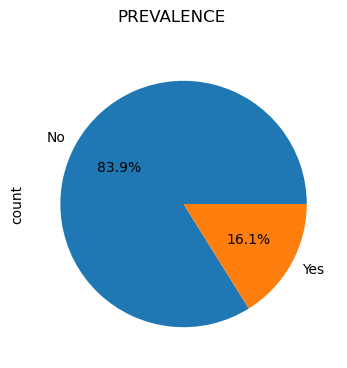

In [17]:
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('PREVALENCE')
data['Attrition'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

In [20]:
# Encode 
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [21]:
data['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [22]:
# Separation
X = data.drop('Attrition', axis= 1)
y = data['Attrition']

In [23]:
# Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [24]:
# Category and Numeric
cat_features = X.select_dtypes(include= ['object']).columns.to_list()
num_features = X.select_dtypes(include= ['int64', 'float64']).columns.to_list()

In [25]:
cat_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [26]:
num_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [27]:
# Pipeline numerics
numeric_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy= 'median')),
    ('scaler', StandardScaler())
])

In [28]:
# Pipeline categoric
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Pre-process
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

In [30]:
# Model Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])


In [31]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'Mon...
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18', 'OverTime'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [32]:
# predict
y_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8945578231292517

In [35]:
# Coeficients
coefficients = model.named_steps['classifier'].coef_[0]

In [36]:
features_names = num_features + list(model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(cat_features))

In [37]:
features_names

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'Jo

In [38]:
coeff_data = pd.DataFrame({'Atribut': features_names, 'Coefficient': coefficients}).sort_values(by= 'Coefficient', ascending=False)

In [66]:
coeff_data.head(10)

,Atribut,Coefficient
54,OverTime_Yes,1.039938
42,JobRole_Laboratory Technician,1.020678
27,BusinessTravel_Travel_Frequently,0.830317
48,JobRole_Sales Representative,0.784274
51,MaritalStatus_Single,0.735787
22,YearsAtCompany,0.663086
37,EducationField_Technical Degree,0.627767
24,YearsSinceLastPromotion,0.502098
13,NumCompaniesWorked,0.501348
41,JobRole_Human Resources,0.460598


#### Conclusion

##### The coefficients in logistic regression indicate the strength and direction of the association between each feature (attribute) and the probability of the target event occurring, which in this case is voluntary dismissal (Attrition).

***Top 10 Coefficients:***

1. **OverTime_Yes	1.039938**   
   
   A greater distance from home to work is associated with a greater likelihood of voluntary resignation. Long commutes can cause burnout and dissatisfaction.
2. **JobRole_Laboratory Technician	1.020678**
   
   Employees who work as laboratory technicians are more likely to voluntarily quit. This may indicate dissatisfaction with the specific role or work environment.
3. **BusinessTravel_Travel_Frequently	0.830317**
   
   Employees who travel frequently for business are more likely to voluntarily resign. This coefficient is quite significant, suggesting that travel frequency may be a factor in stress or dissatisfaction.

4. **JobRole_Sales Representative	0.784274**
   
   Employees who work as sales representatives are more likely to voluntarily resign. This role may have high performance pressure or lack of adequate support.

5. **MaritalStatus_Single	0.735787**
   
   Single employees are more likely to voluntarily quit compared to married employees or employees in other marital statuses. This may be due to greater flexibility and fewer personal responsibilities.

6. **YearsAtCompany	0.663086**
   
   The more years an employee has spent with the company, the more likely they are to voluntarily resign. This may indicate that after a certain period of time, employees may feel stagnant or seek new opportunities.

7. **EducationField_Technical Degree	0.627767**
   
   Employees with a technical degree are more likely to voluntarily resign compared to those with other educational backgrounds. This may indicate that these employees have more opportunities in the job market or that their expectations are not being met.

8. **YearsSinceLastPromotion	0.502098**
   
   Employees who have spent more years since their last promotion are more likely to voluntarily resign. This may indicate dissatisfaction with growth opportunities within the company.

9. **NumCompaniesWorked	0.501348**
    
    Employees who have worked for a greater number of companies throughout their career are more likely to voluntarily resign.

10. **JobRole_Human Resources	0.460598**
   
    Employees who work as human resourses are more likely to voluntarily resign. This role may have high performance pressure or lack of adequate support.
   
In other words, analyzing the coefficients of a logistic regression model helps us understand the influence of each attribute on the probability of the event of interest. Positive coefficients indicate that, as the value of the attribute increases, the probability of the employee voluntarily resigning also increases.   
